In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.sparse as sp
from sklearn.neighbors import NearestNeighbors
from models.knn import KNN
from datasets.gb import GoodBooks
from repsys import ModelEvaluator
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.WARNING)

In [2]:
gb = GoodBooks()
gb.load('.repsys_checkpoints/gb/')

DEBUG:repsys.dataset:Loading dataset from '.repsys_checkpoints/gb/dataset-split-1654328214.zip'


In [4]:
knn = KNN()
knn.dataset = gb
knn.fit()

In [5]:
evaluator = ModelEvaluator(
    dataset=gb,
    precision_recall_k=[20, 50],
    ndcg_k=[100],
    coverage_k=[10],
    diversity_k=[10],
    novelty_k=[10],
    coverage_lt_k=[10],
    percentage_lt_k=[10],
)

In [35]:
x = [5, 20, 50, 100, 200, 300, 500, 1000]

In [ ]:
results = []
for k in x:
    knn.k = k
    knn.fit()
    evaluator.evaluate(knn)
    df = evaluator.get_user_results(model_name="knn")
    results.append(df.mean())

In [42]:
results[0].keys()

Index(['id', 'Recall@20', 'Recall@50', 'NDCG@100', 'Diversity@10',
       'Novelty@10', 'APL@10', 'Precision@20', 'Precision@50', 'MAE', 'MSE',
       'RMSE'],
      dtype='object')

In [36]:
def plot_metric(metric):
    y = [x[metric] for x in results]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o')
    plt.grid()
    plt.xticks(x)
    plt.title(f"{metric} for different no. of neighbors")
    plt.show()

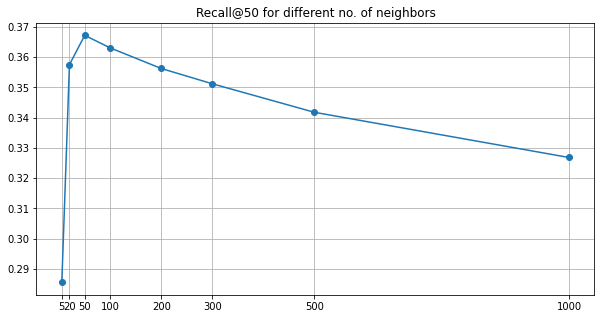

In [37]:
plot_metric("Recall@50")

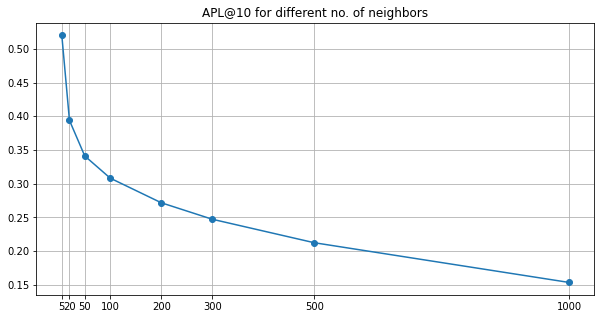

In [43]:
plot_metric("APL@10")

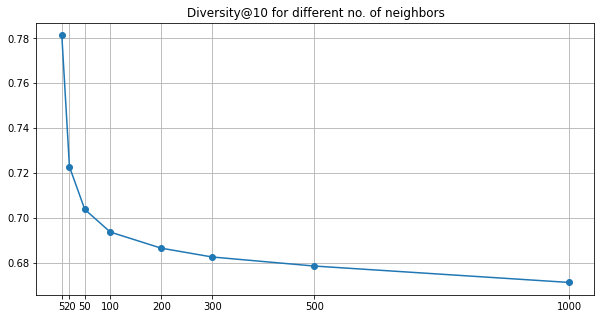

In [45]:
plot_metric("Diversity@10")